## Attribute Assortativity Coefficient for Overlapping Enumerative Attributes

### Moses Boudourides

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random
import math
import itertools
import numpy as np
import scipy as sp
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
from pylab import hist
from IPython.display import Image
from IPython.core.display import HTML 
from netwulf import visualize

### 1. A Simple Example

In [2]:
G=nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,0)]) #(2,3)])
print G.nodes()
print G.edges()

[0, 1, 2]
[(0, 1), (0, 2), (1, 2)]


#### Associating overlapping attributes to nodes

In [3]:
Gd=nx.Graph(G)
membership={0: ['attr_0','attr_1'], 1: ['attr_0','attr_2'], 2: ['attr_1', 'attr_2']}
kkp=[]
for mv in membership.values():
    for mmv in mv:
        if mmv not in kkp:
            kkp.append(mmv)
kp=len(kkp)
print kp, kkp
nx.set_node_attributes(Gd, membership, 'attribute')
for i in Gd.nodes(data=True):
    print i
print Gd.edges()

3 ['attr_0', 'attr_1', 'attr_2']
(0, {'attribute': ['attr_0', 'attr_1']})
(1, {'attribute': ['attr_0', 'attr_2']})
(2, {'attribute': ['attr_1', 'attr_2']})
[(0, 1), (0, 2), (1, 2)]


#### The "multiplied" graph in which each node has a simple (non-overlapping) attribute

In [4]:
Gdm=nx.Graph()

for i in Gd.nodes(data=True):
    for j in i[1]['attribute']:
        no=j.replace('attr',str(i[0]))
        Gdm.add_node(no,attribute=j) #i[1]['attribute'])
        
medges=[]
for j in list(itertools.combinations(list(Gdm.nodes()), 2)):
    u0=j[0].index('_')
    u1=j[1].index('_')
    uu=(int(j[0][:u0]),int(j[1][:u1]))
    if uu in Gd.edges():
        if uu not in medges:
            medges.append(j)

Gdm.add_edges_from(medges)
print "Gd",len(Gd.nodes()),len(Gd.edges())
print "Gdm",len(Gdm.nodes()),len(Gdm.edges())
print Gdm.edges()

Gd 3 3
Gdm 6 12
[('2_1', '0_1'), ('2_1', '1_2'), ('2_1', '0_0'), ('2_1', '1_0'), ('2_2', '0_1'), ('2_2', '1_2'), ('2_2', '0_0'), ('2_2', '1_0'), ('1_2', '0_0'), ('1_2', '0_1'), ('1_0', '0_0'), ('1_0', '0_1')]


In [5]:
nx.attribute_assortativity_coefficient(Gdm,'attribute')

-0.12499999999999988

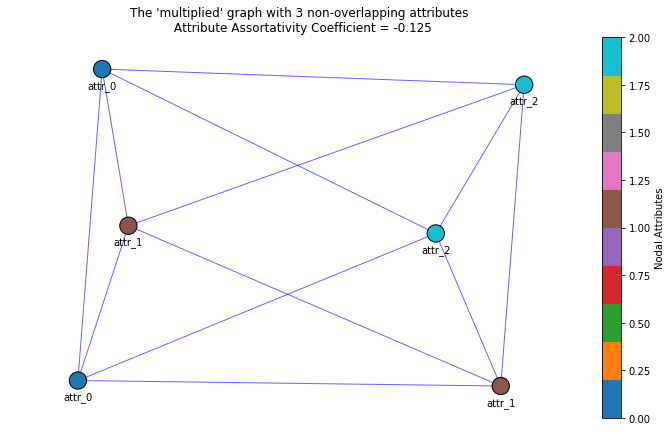

In [6]:
plt.figure(figsize=(12,7));
pos = graphviz_layout(Gdm) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
node_color=[]
for n in Gdm.nodes(data=True):
    node_color.append(int(n[1]['attribute'].replace("attr_","")))
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.tab10 #coolwarm
nodes = nx.draw_networkx_nodes(Gdm, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gdm, pos,edge_color='b',alpha=0.6)
plt.axis('off');
node_attrs = nx.get_node_attributes(Gdm, 'attribute')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    custom_node_attrs[node] = attr 
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] - 5)
nx.draw_networkx_labels(Gdm, pos_attrs, labels=custom_node_attrs,font_size=10);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Nodal Attributes") #, orientation='horizontal')
plt.margins(x=0.1, y=0.1)
sst="The 'multiplied' graph with %i non-overlapping attributes \n Attribute Assortativity Coefficient = %.3f" %(kp,nx.attribute_assortativity_coefficient(Gdm,'attribute'))
plt.title(sst);

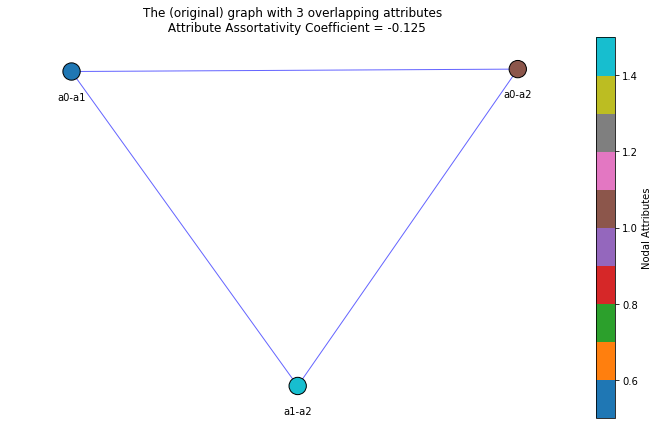

In [7]:
plt.figure(figsize=(12,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
node_color=[]
for n in Gd.nodes(data=True):
    la=[int(x.replace("attr_","")) for x in n[1]['attribute']]
    node_color.append(sum(la)/float(len(la)))
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.tab10 #coolwarm
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.6)
plt.axis('off');
# yoffset = {}
# y_off = -0.08  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(G, yoffset);
node_attrs = nx.get_node_attributes(Gd, 'attribute')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    att=[x.replace('attr_','a') for x in attr]
    custom_node_attrs[node] = '-'.join(att)
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] - 5)
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Nodal Attributes") #, orientation='horizontal')
plt.margins(x=0.1, y=0.1)
sst="The (original) graph with %i overlapping attributes \n Attribute Assortativity Coefficient = %.3f" %(kp, nx.attribute_assortativity_coefficient(Gdm,'attribute'))
plt.title(sst);

### 2. Artificially Constructed Random Graphs with Overlapping Attributes

In [8]:
def is_part(G,P):
    t=[]
    for i in P:
        if len(i)!=0:
            if sorted([qq for q in P for qq in q])==sorted(G.nodes()):
                t.append(0)
            else:
                t.append(1)
    for k in list(itertools.combinations(P, 2)):
        if len(set(k[0]).intersection(set(k[1])))==0:
            t.append(0)
        else:
            t.append(1)
    if list(set(t))==[0]:
        return True 
    else:
        return False 
    
def is_decomp(G,P):
    t=[]
    for i in P:
        if len(i)!=0:
            if sorted([qq for q in P for qq in q])==sorted(G.nodes()):
                t.append(0)
    if list(set(t))==[0]:
        return True 
    else:
        return False 
    
def chunk(xs, n):
    ys = list(xs)
    random.shuffle(ys)
    size = len(ys) // n
    leftovers= ys[size*n:]
    for c in xrange(n):
        if leftovers:
           extra= [ leftovers.pop() ] 
        else:
           extra= []
        Y=ys[c*size:(c+1)*size] + extra
        yield sorted(Y)

    
def rpart(G,k):
    P=list(chunk(G.nodes(),k))
    return P
    

def rdecomp(G,k):
    while True:
        P=[]
        for i in range(k):
            n=random.choice(range(1,len(G)))
            P.append(sorted(random.sample(G.nodes(),n)))
        if set([qq for q in P for qq in q])==set(G.nodes()):
            break
    return P

def rattr(G,k,type):   
    if type=='p':
        Gp=nx.Graph(G)
        P=rpart(Gp,k)
        membership={}
        for n in Gp.nodes():
            for i,p in list(enumerate(P)):
                if n in p:
                    membership[n]="attr_"+str(i)
        nx.set_node_attributes(Gp, membership, 'attribute')
        return P,Gp
    if type=='d':
        Gd=nx.Graph(G)
        P=rdecomp(Gd,k)
        membership={}
        for n in Gd.nodes():
            t=[]
            for i,p in list(enumerate(P)):
                if n in p:
                    t.append("attr_"+str(i))
            membership[n]=t
        nx.set_node_attributes(Gd, membership, 'attribute')
        return P,Gd

#### An Erdos-Renyi Random Graph

In [9]:
while True:
    G=nx.erdos_renyi_graph(50,0.04)
    if nx.is_connected(G):
        break
        
# G=nx.karate_club_graph()

#### Associating overlapping attributes to nodes

In [10]:
kp=10 #number of overlapping attributes
Y=rattr(G,kp,'d')
print Y[0]
Gd=Y[1]
for i in Gd.nodes(data=True):
    print i
print len(Gd.nodes()),len(Gd.edges())

[[2, 5, 10, 12, 17, 20, 26, 29, 30, 32, 33, 37, 38, 41, 48], [1, 3, 4, 16, 20, 25, 36, 41, 43, 46], [1, 2, 4, 5, 8, 10, 13, 14, 17, 19, 20, 21, 22, 25, 26, 27, 28, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 46], [2, 11, 16, 17, 19, 20, 26, 27, 29, 30, 32, 33, 38, 39, 40, 45, 46, 48], [0, 5, 8, 13, 14, 29, 34, 38, 47, 48], [0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 29, 30, 31, 32, 34, 35, 36, 37, 39, 40, 41, 43, 45, 47], [1, 2, 7, 8, 9, 10, 14, 16, 19, 20, 21, 24, 28, 29, 30, 31, 32, 34, 35, 36, 38, 41, 42, 44, 45, 46], [0, 1, 3, 6, 7, 10, 13, 17, 18, 21, 23, 31, 32, 35, 36, 38, 39, 40, 42, 46, 47, 48], [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 24, 27, 29, 30, 31, 32, 33, 36, 38, 40, 41, 42, 43, 44, 45, 47]]
(0, {'attribute': ['attr_4', 'attr_5', 'attr_8', 'attr

#### The "multiplied" graph in which each node has a simple (non-overlapping) attribute

In [11]:
Gdm=nx.Graph()

for i in Gd.nodes(data=True):
    for j in i[1]['attribute']:
        no=j.replace('attr',str(i[0]))
        Gdm.add_node(no,attribute=j) #i[1]['attribute'])
        
medges=[]
for j in list(itertools.combinations(list(Gdm.nodes()), 2)):
    u0=j[0].index('_')
    u1=j[1].index('_')
    uu=(int(j[0][:u0]),int(j[1][:u1]))
    if uu in Gd.edges():
        if uu not in medges:
            medges.append(j)

Gdm.add_edges_from(medges)
print "Gd",len(Gd.nodes()),len(Gd.edges())
print "Gdm",len(Gdm.nodes()),len(Gdm.edges())
print Gdm.edges()

Gd 50 60
Gdm 243 1373
[('38_0', '35_5'), ('38_0', '35_7'), ('38_0', '35_6'), ('38_0', '44_5'), ('38_0', '44_7'), ('38_0', '44_9'), ('38_0', '37_2'), ('38_0', '37_0'), ('38_0', '35_8'), ('38_0', '37_5'), ('38_0', '37_6'), ('38_0', '44_2'), ('43_1', '2_9'), ('43_1', '48_8'), ('43_1', '2_0'), ('43_1', '48_4'), ('43_1', '2_2'), ('43_1', '2_3'), ('43_1', '2_5'), ('43_1', '2_6'), ('43_1', '2_7'), ('43_1', '5_2'), ('43_1', '5_0'), ('43_1', '48_3'), ('43_1', '5_5'), ('43_1', '5_4'), ('43_1', '48_5'), ('43_1', '5_9'), ('43_1', '48_0'), ('43_6', '2_9'), ('43_6', '48_8'), ('43_6', '2_0'), ('43_6', '48_4'), ('43_6', '2_2'), ('43_6', '2_3'), ('43_6', '2_5'), ('43_6', '2_6'), ('43_6', '2_7'), ('43_6', '5_2'), ('43_6', '5_0'), ('43_6', '48_3'), ('43_6', '5_5'), ('43_6', '5_4'), ('43_6', '48_5'), ('43_6', '5_9'), ('43_6', '48_0'), ('43_5', '2_9'), ('43_5', '48_8'), ('43_5', '2_0'), ('43_5', '48_4'), ('43_5', '2_2'), ('43_5', '2_3'), ('43_5', '2_5'), ('43_5', '2_6'), ('43_5', '2_7'), ('43_5', '5_2'), (

In [12]:
nx.attribute_assortativity_coefficient(Gdm,'attribute')

0.000745319087845479

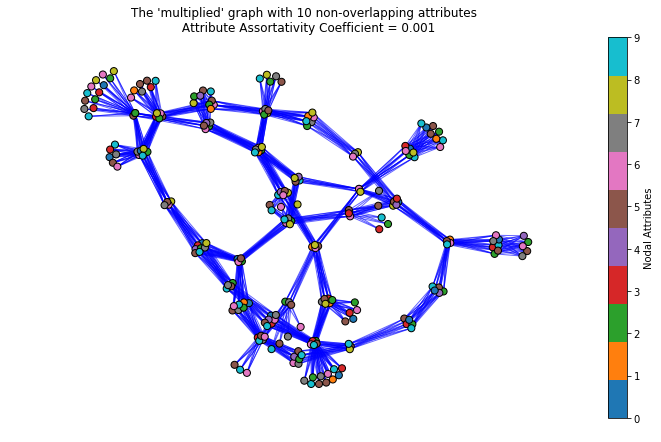

In [13]:
plt.figure(figsize=(12,7));
pos = nx.spring_layout(Gdm, iterations=1000) #graphviz_layout(Gdm) 
node_border_color='k'
node_color=[]
for n in Gdm.nodes(data=True):
    node_color.append(int(n[1]['attribute'].replace("attr_","")))
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.tab10 #coolwarm
nodes = nx.draw_networkx_nodes(Gdm, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax,node_size=50)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gdm, pos,edge_color='b',alpha=0.6)
plt.axis('off');
node_attrs = nx.get_node_attributes(Gdm, 'attribute')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    custom_node_attrs[node] = attr 
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] - 5)
nx.draw_networkx_labels(Gdm, pos_attrs, labels=custom_node_attrs,font_size=10);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Nodal Attributes") #, orientation='horizontal')
plt.margins(x=0.1, y=0.1)
sst="The 'multiplied' graph with %i non-overlapping attributes \n Attribute Assortativity Coefficient = %.3f" %(kp,nx.attribute_assortativity_coefficient(Gdm,'attribute'))
plt.title(sst);

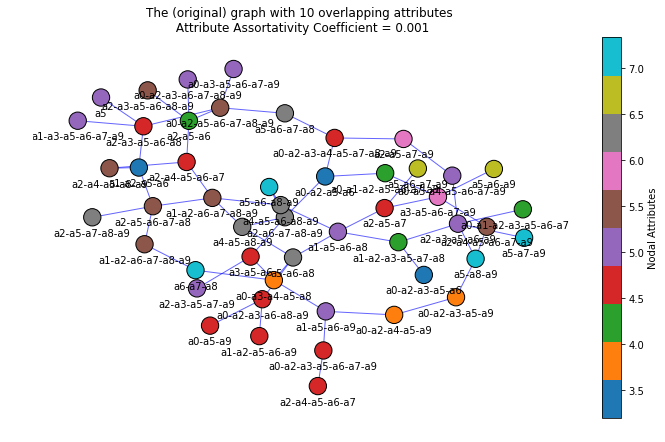

In [14]:
plt.figure(figsize=(12,7));
pos = graphviz_layout(G) #nx.spring_layout(G, iterations=1000) #
node_border_color='k'
node_color=[]
for n in Gd.nodes(data=True):
    la=[int(x.replace("attr_","")) for x in n[1]['attribute']]
    node_color.append(sum(la)/float(len(la)))
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.tab10 #coolwarm
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.6)
plt.axis('off');
# yoffset = {}
# y_off = -0.08  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(G, yoffset);
node_attrs = nx.get_node_attributes(Gd, 'attribute')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    att=[x.replace('attr_','a') for x in attr]
    custom_node_attrs[node] = '-'.join(att)
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] - 35)
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs,font_size=10);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Nodal Attributes") #, orientation='horizontal')
plt.margins(x=0.1, y=0.1)
sst="The (original) graph with %i overlapping attributes \n Attribute Assortativity Coefficient = %.3f" %(kp, nx.attribute_assortativity_coefficient(Gdm,'attribute'))
plt.title(sst);